In [ ]:
'''
assumption 2: multicollinearity should not be there: for ex in car price, age and year should not be 2 features
    Solution to this is VIF. In detail below

VIF:
    formula (not important because in built function in statmodel): 1/(1-r_square)
    higher the vif, lesser is feature relevant
    ranges of vif: 0-5= relevant, 5-10=medium, 10 and above=completely irrelevant
    Process in modeling
        1 - run regression and calculate r_square
        2 - use inuilt fuinction to calculate vif for all features
        3 - Remove feature with highest vif
        4 - again repeat steps from 1-3 till you have good r_square and VIFs

assumption 3: normality of residual - errors should follow normal curve
    if errors are left or right skewed, then there are outliers and we need to get rid of those outliers

assumption 4: heteroscedacity
    errors against y values should not be heterogenous or distributed randomly
    goldfeld quandt test: check rss of first half and second half
        formula: rss1/n1/(rss2/n2)
    use statmodel direct function
        if p>0.05, model is homeoscedioscity

assumption 5: auto correlation
    in case of time series, plot errors against time, no pattern should be there in time vs error
'''

# Complete process while checking assumptions

## Fetching and cleaning the input file

In [60]:
import datetime as dt
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import statsmodels
import sklearn.linear_model
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from scipy import stats
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [19]:
df_car=pd.read_csv(r"C:\Users\28962\Documents\GitHub\DSML\13_intro_to_ml_nn\13.2_intro_to_ml_ml_linear_regression_1\cars24-car-price-cleaned.csv")

def target_encoding(df,tar,var):
    df[var]=df.groupby([var])[tar].transform('mean')
    return df

target_encoding(df_car,'selling_price','make')
target_encoding(df_car,'selling_price','model')

# scaling

scaler=StandardScaler()
df_car_scaled=pd.DataFrame(scaler.fit_transform(df_car),columns=df_car.columns)

y=df_car_scaled['selling_price']
x=df_car_scaled.drop('selling_price',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

 

## Adding constant and running prediction model

In [20]:
x_train_sm=sm.add_constant(x_train)
sm_model=sm.OLS(y_train, x_train_sm).fit()
y_check=sm_model.predict(x_train_sm)
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.592e+04
Date:                Sun, 02 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:26:15   Log-Likelihood:                 495.39
No. Observations:               15856   AIC:                            -954.8
Df Residuals:                   15838   BIC:                            -816.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0009      0.002  

## Checking second assumption - VIF

In [21]:
vif=pd.DataFrame()
vif['fields']=x_train.columns
vif['vif']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif=vif.sort_values(by='vif',ascending=False)
print(vif)

c:\Users\28962\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


              fields        vif
0               year        inf
5                age        inf
13            Petrol  18.461491
10            Diesel  17.581955
16                >5  12.907010
15                 5  11.727608
3             engine   6.209396
7              model   6.154458
4          max_power   5.075197
6               make   3.311464
2            mileage   3.119836
14            Manual   1.806763
12               LPG   1.245952
1          km_driven   1.220734
11          Electric   1.206219
8         Individual   1.091283
9   Trustmark Dealer   1.021193


In [22]:
# Removing field with highest vif and running vif again

x_train_sm_2=x_train_sm.drop('year',axis=1)
x_train_2=x_train.drop('year',axis=1)
sm_model_2=sm.OLS(y_train, x_train_sm_2).fit()
y_check_2=sm_model_2.predict(x_train_sm_2)
print(sm_model_2.summary())

# r square looks ok and hence now checking vif again

vif=pd.DataFrame()
vif['fields']=x_train_2.columns
vif['vif']=[variance_inflation_factor(x_train_2.values,i) for i in range(x_train_2.shape[1])]
vif=vif.sort_values(by='vif',ascending=False)
print(vif)

# KEEP REPEATING THE ABOVE METHODS TILL YOU ATTAIN THE FOLLOWING CONDITIONS: R_SQUARE > 0.85 AND VIF <5





                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.692e+04
Date:                Sun, 02 Feb 2025   Prob (F-statistic):               0.00
Time:                        21:27:36   Log-Likelihood:                 495.39
No. Observations:               15856   AIC:                            -956.8
Df Residuals:                   15839   BIC:                            -826.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0009      0.002  

## Checking 3rd assumption - error normalcy 

<Axes: ylabel='Count'>

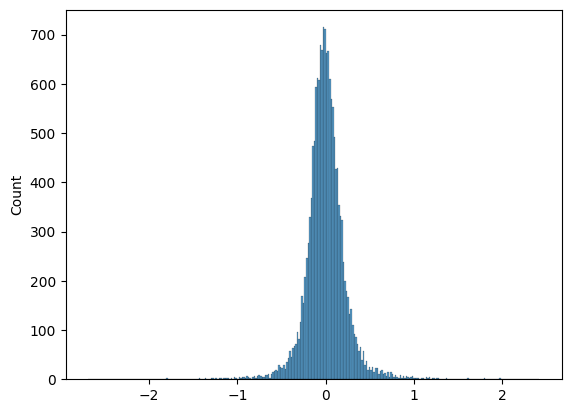

In [46]:
y_err = y_train - y_check
sns.histplot(y_err)

In [50]:
# Normality test
res = stats.shapiro(y_err)
print(res)
res.statistic

# HERE VALUE IS CLOSER TO 1, HENCE IT IS A NORMAL DISTRIBUTION 

ShapiroResult(statistic=np.float64(0.8939823702339987), pvalue=np.float64(4.45159031862289e-73))


c:\Users\28962\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15856.
  res = hypotest_fun_out(*samples, **kwds)


np.float64(0.8939823702339987)

## Checking 4th assumption - heteroscedasticity

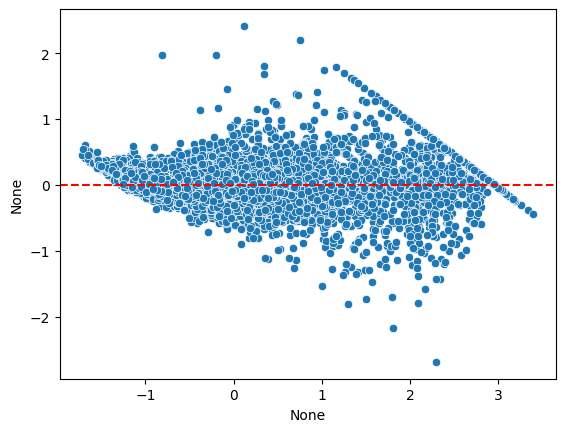

In [59]:
# errors should be equally distributed equally for all Ys

sns.scatterplot(x=y_check,y=y_err)
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [64]:
# check goldfeld_quadt test for heteroskedasticity
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, x_train)

lzip(name, test)

# F STATS  CLOSE TO 1 SHOWS THAT THERE IS MINIMAL DIFFERENCE BETWEEN 2 GROUPS
# p-value of 0.79 indicates that this difference is statistically significant at conventional levels of significance (e.g., 0.05).

# Therefore, we accept the null hypothesis of homoscedasticity

[('F statistic', np.float64(0.9820711184401042)),
 ('p-value', np.float64(0.7894705781056279))]

## 5TH Assumptin  

In [ ]:
# Only for time series data - that error values are distributed similarly with time